In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [2]:
#Temperatures tested
temps = [0.1, 0.3, 0.5, 0.75, 1, 2, 5]

In [3]:
#T = 0.1
f = [0, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1, 2, 5]
t = 0.1
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT01'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT01'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01 = CGT(f, t, Rgpaths, Reepaths)

In [4]:
#T = 0.3
f = [0, 0.5, 0.75, 1, 2, 5]
t = 0.3
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT03'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT03'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT03 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 2


In [5]:
#T = 0.5
f = [0, 0.1, 0.5, 0.6, 0.75, 0.9, 1, 1.1, 1.3, 1.5, 2, 5]
t = 0.5
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT05'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT05'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT05 = CGT(f, t, Rgpaths, Reepaths)

In [6]:
#T = 0.75
f = [0, 0.5, 0.75, 1, 2, 5]
t = 0.75
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT075'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT075'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT075 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 0.75


In [7]:
#T = 1
f = [0, 0.1, 0.5, 1, 2, 5]
t = 1
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT1'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT1'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT1 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 0.1


In [8]:
#T = 2
f = [0, 0.1, 0.5, 1, 2, 5]
t = 2
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT2'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT2'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT2 = CGT(f, t, Rgpaths, Reepaths)

In [9]:
#T = 5
f = [0, 0.1, 0.5, 1, 2, 5]
t = 5
Rgfolder = '../Data/Block5/Radius of gyration/ForcesT5'
Reefolder = '../Data/Block5/End-to-end distance/ForcesT5'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT5 = CGT(f, t, Rgpaths, Reepaths)

In [10]:
lsCGTBl5 = [CGT01,CGT03,CGT05,CGT075,CGT1,CGT2,CGT5]
%store lsCGTBl5
forces = ms.lsForces(lsCGTBl5)
print(forces)

Stored 'lsCGTBl5' (list)
[0, 0.1, 0.5, 0.75, 1, 2, 5]


## Check Equilibrium

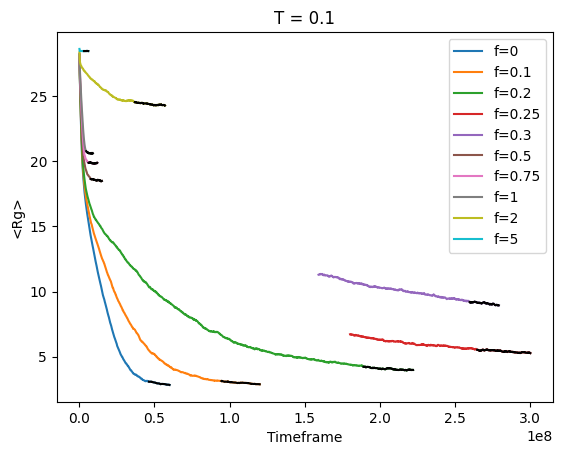

In [11]:
CGT01.Plot('Rg')

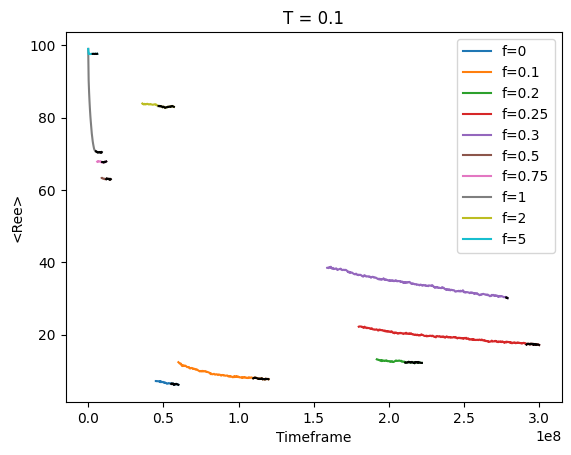

In [12]:
CGT01.Plot('Ree')

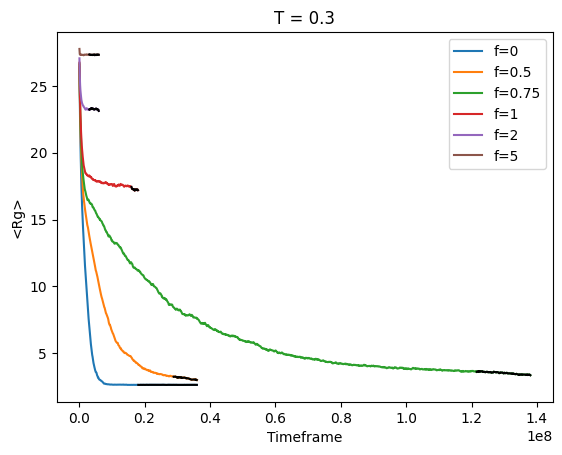

In [13]:
CGT03.Plot('Rg')

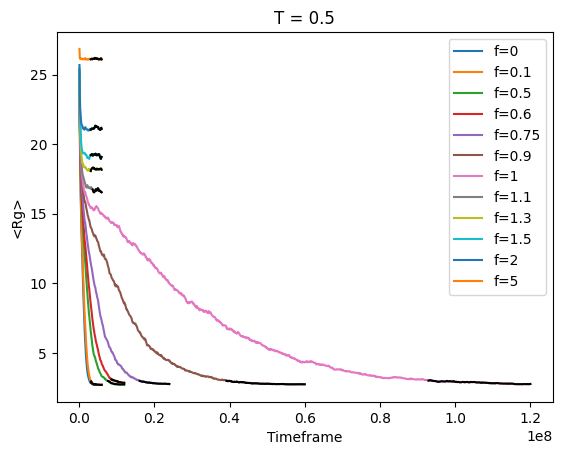

In [14]:
CGT05.Plot('Rg')
# plt.xlim(0, 1.2e7)

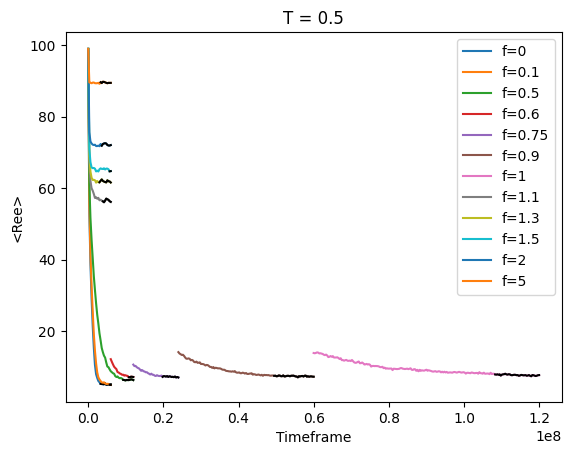

In [15]:
CGT05.Plot('Ree')

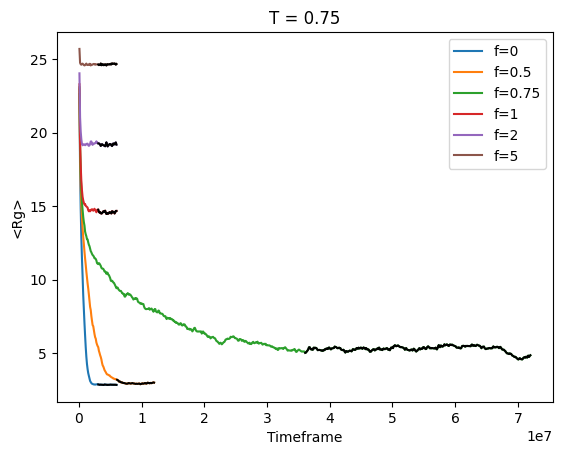

In [16]:
CGT075.Plot('Rg')

Use temporary mean starting halfway:F = 0.75


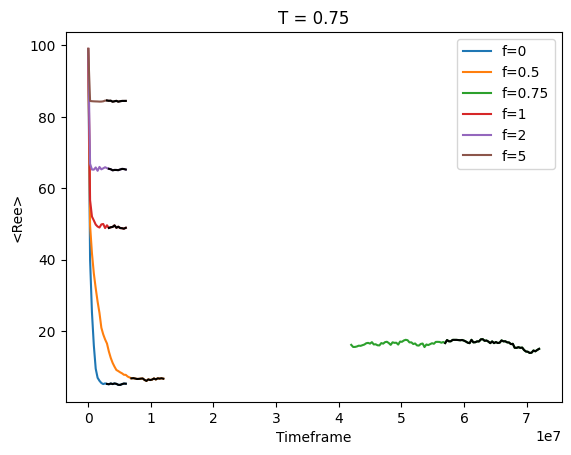

In [17]:
CGT075.Plot('Ree')

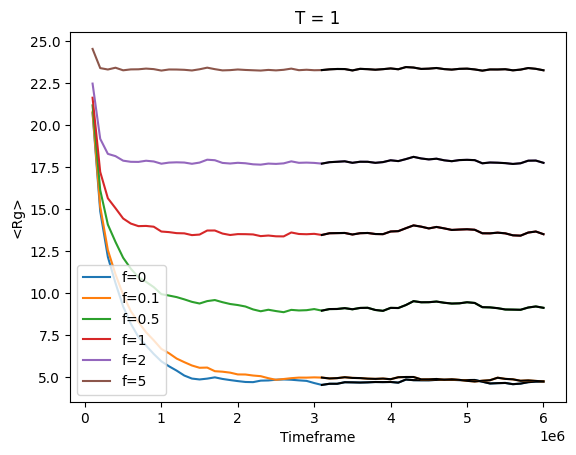

In [18]:
CGT1.Plot('Rg')

## Temperature Extension

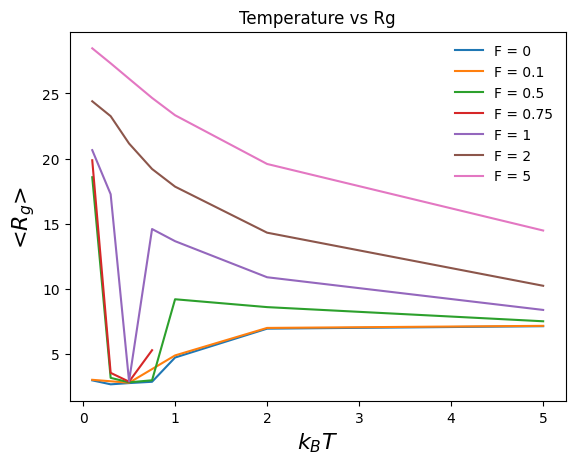

In [19]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl5:
        try:
            i = cgt.f.index(f)
        except ValueError:
            
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRg[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
plt.savefig('../Data/Block5/Figures/TvsRg')

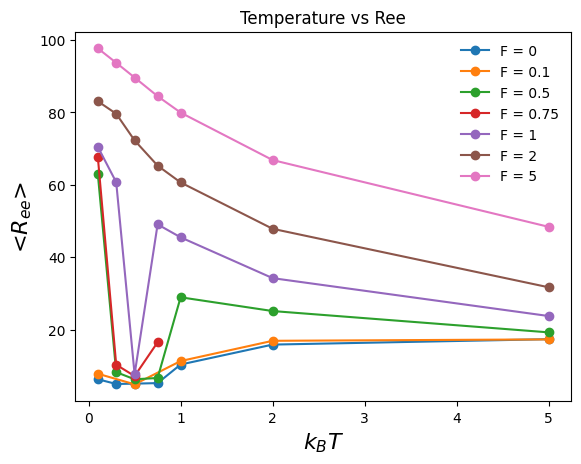

In [20]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl5:
        try:
            i = cgt.f.index(f)
        except ValueError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRee[i])
    plt.plot(tempsCopy, data, 'o-', label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
plt.savefig('../Data/Block5/Figures/TvsRee')

## Force Extension

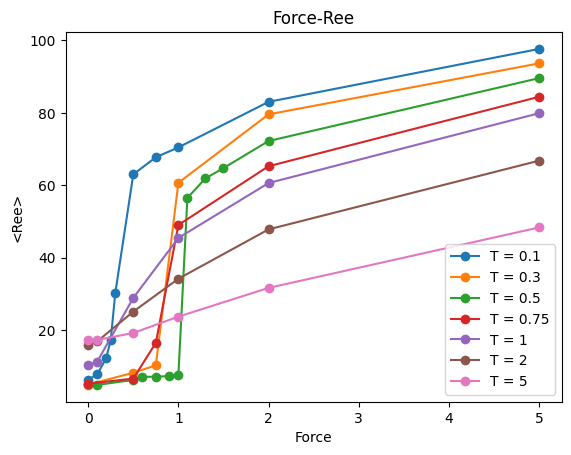

In [21]:
#Ree
for cgt in lsCGTBl5:
    plt.plot(cgt.f, cgt.aveRee, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
plt.savefig('../Data/Block5/Figures/FvsRee')

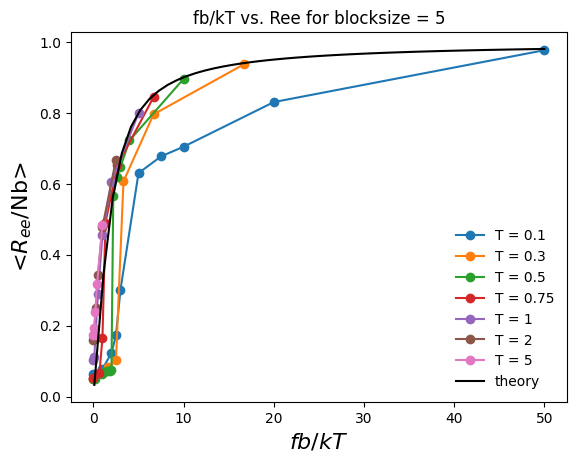

In [22]:
for cgt in lsCGTBl5:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0.1, 50)
y = 1 / np.tanh(x) - 1 / x
# y2 = y *3/5
plt.plot(x,y, color = 'k', label = 'theory')
# plt.plot(x,y2, color = 'k')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree for blocksize = 5")
plt.savefig('../Data/Block5/Figures/Fbkt vs Ree')
# plt.xlim(0,10)
# plt.savefig('../Data/Block5/Figures/Fbkt vs ReeZoom')

(-1.0, 30.0)

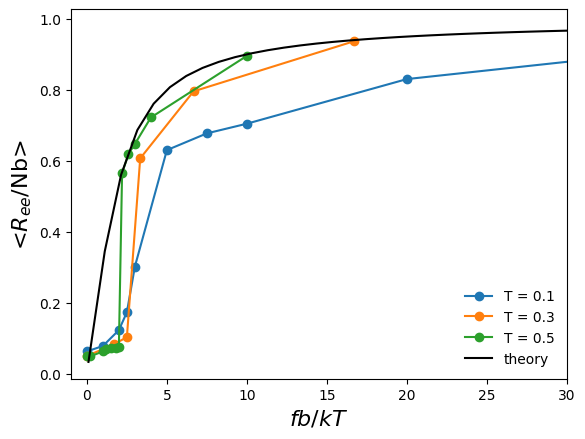

In [75]:
#Below Critical temperature
for cgt in lsCGTBl5[0:3]:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.plot(x,y, color = 'k', label = 'theory')
plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.xlim(-1,30)

Text(0, 0.5, '<$R_{seg}$/Nb>')

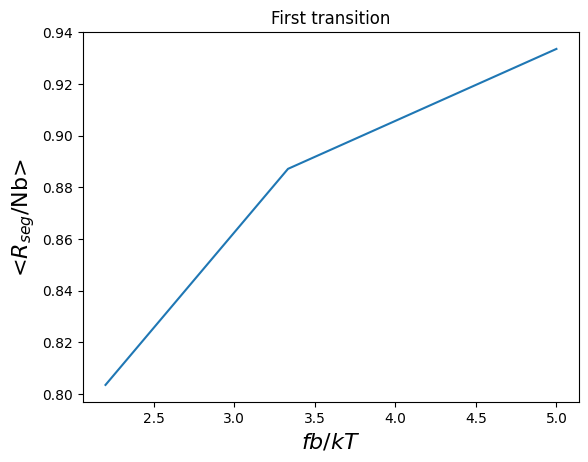

In [84]:
# After first transition
dGlobule = np.sqrt(6) / 3 * 2
fbkt = [0.5/0.1, 1/0.3, 1.1/0.5]
Ree = [CGT01.aveRee[5], CGT03.aveRee[3], CGT05.aveRee[7]]
Rseg = (Ree - 10 * dGlobule) / 10
plt.title('First transition')
plt.plot(fbkt, Rseg / 5)
plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{seg}$/Nb>', fontsize=16)

## Unfold

In [24]:
# T = 0.1
f = [0, 0.5, 1, 2, 5]
t = 0.1
Rgfolder = '../Data/Block5/Unfold/T0.1/Rg'
Reefolder = '../Data/Block5/Unfold/T0.1/Ree'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01Inv = CGT(f,t,Rgpaths, Reepaths)

In [25]:
# T = 0.5
f = [0, 0.5, 0.6, 0.75, 0.9, 1, 2]
t = 0.5
Rgfolder = '../Data/Block5/Unfold/T0.5/Rg'
Reefolder = '../Data/Block5/Unfold/T0.5/Ree'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT05Inv = CGT(f,t,Rgpaths, Reepaths)

(0.0, 6.0)

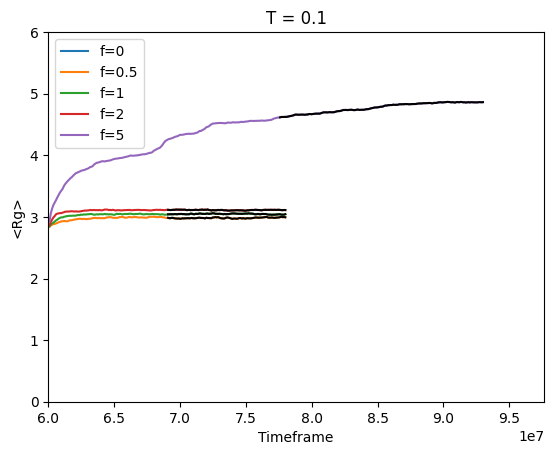

In [26]:
CGT01Inv.Plot('Rg')
plt.xlim(6e7)
plt.ylim(0, 6)

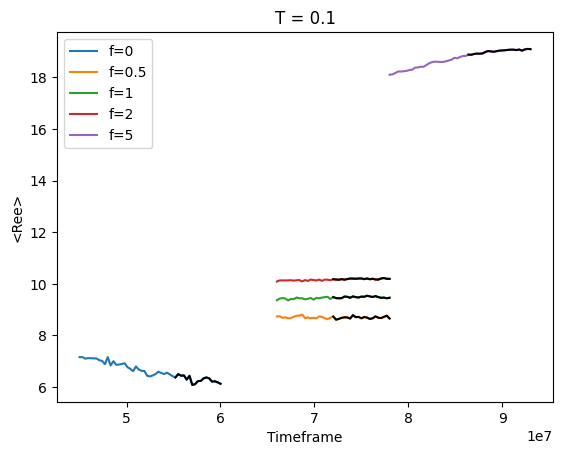

In [27]:
CGT01Inv.Plot('Ree')

(0.0, 10.0)

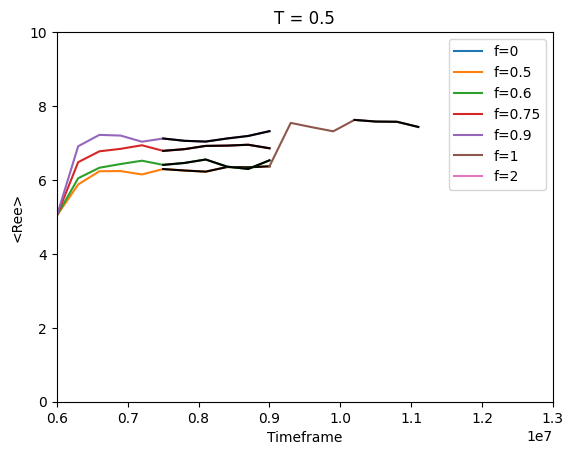

In [28]:
CGT05Inv.Plot('Ree')
plt.xlim(0.6e7, 1.3e7)
plt.ylim(0, 10)

Text(0.5, 1.0, 'T = 0.5')

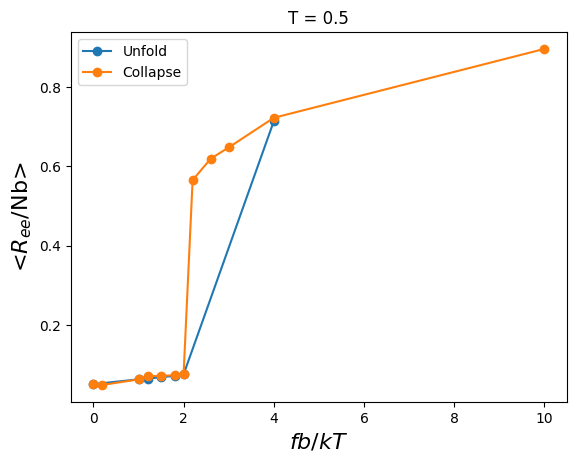

In [29]:
# # Comparison
f05 = np.array(CGT05.f)
force = np.array(CGT05Inv.f)
Ree05 = np.array(CGT05.aveRee)
Ree = np.array(CGT05Inv.aveRee)
plt.plot(force / CGT05Inv.t,  Ree / 100, 'o-', label = 'Unfold')
plt.plot(f05 / CGT05.t, Ree05 / 100, 'o-', label = 'Collapse')
plt.legend()
plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.title('T = 0.5')

Text(0.5, 1.0, 'T = 0.1')

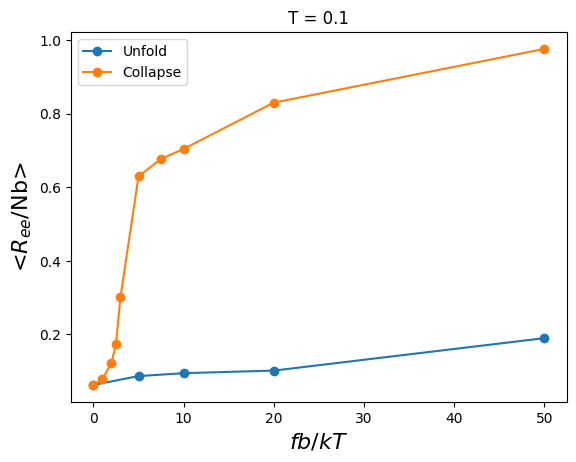

In [30]:
# # Comparison
force = np.array(CGT01Inv.f)
f01 = np.array(CGT01.f)
Ree01 = np.array(CGT01.aveRee)
Ree = np.array(CGT01Inv.aveRee)
plt.plot(force / CGT01Inv.t,  Ree / 100, 'o-', label = 'Unfold')
plt.plot(f01 / CGT01.t, Ree01 / 100, 'o-', label = 'Collapse')
plt.legend()
plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.title('T = 0.1')
